In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import casadi as ca
import os
import matplotlib.pyplot as plt
sys.path.insert(0, '../../src')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from pymola.backends.xml import modelica_xml_parser, hybrid_dae, sim_scipy

In [14]:
example_file = os.path.join(
    modelica_xml_parser.FILE_PATH, 'bouncing-ball.xml')
model = modelica_xml_parser.parse(example_file)

In [15]:
model


c     (  2):	[c_0, c_1]
dx    (  2):	[der(x), der(v)]
f_c   (  2):	@1=0, [(x<@1), (x<@1)]
f_m   (  0):	[]
f_x   (  2):	[(der(x)-v), ((c_0?der(v):0)+((!c_0)?(der(v)+g):0))]
m     (  0):	[]
p     (  2):	[g, c]
pre_m (  0):	[]
x     (  2):	[x, v]
y     (  0):	[]

In [16]:
model_ode = model.to_ode()
model_ode


c     (  2):	[c_0, c_1]
dx    (  2):	[der(x), der(v)]
f_c   (  2):	@1=0, [(x<@1), (x<@1)]
f_m   (  0):	[]
f_x_rhs(  2):	@1=(!c_0), @2=1, [v, (-((@1?g:0)/((c_0?@2:0)+(@1?@2:0))))]
g_rhs (  0):	0x1
m     (  0):	[]
p     (  2):	[g, c]
pre_m (  0):	[]
x     (  2):	[x, v]

In [21]:
model_ode.prop['x']['start'] = 10
data = sim_scipy.sim(model_ode, {'tf': 2, 'dt': 0.01})
data.keys()

dict_keys(['t', 'x', 'y', 'c', 'labels'])

ZeroDivisionError: integer division or modulo by zero

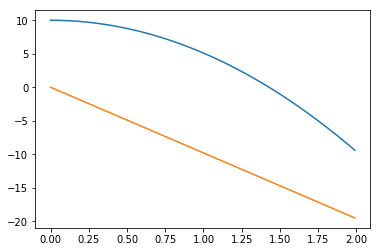

In [22]:
sim_scipy.plot(data)

In [19]:
f_c(1, [-1, 1], [1, 1])

DM([1, 1])

In [9]:
f_x = model_ode.create_function_f_x()
f_x

Function(f_x:(i0[],i1[2],i2[4])->(o0[2]) SXFunction)

In [10]:
model_ode


c     (  2):	[c_0, c_1]
dx    (  2):	[der(x), der(v)]
f_c   (  2):	@1=0, [(x<@1), (x<@1)]
f_m   (  0):	[]
f_x_rhs(  2):	@1=(!c_0), @2=1, [v, (-((@1?g:0)/((c_0?@2:0)+(@1?@2:0))))]
g_rhs (  0):	0x1
m     (  0):	[]
p     (  2):	[g, c]
pre_m (  0):	[]
x     (  2):	[x, v]

In [11]:
f_x(1, [1, 1], [9.8, 0.9, 0, 0])

DM([1, -9.8])